In [2]:
pip install tweepy

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [4]:
consumer_key= '2MxNE0lb1cbfNOhFQ61QJJb51'
consumer_secret= 'cJh8JKvpZY2BDRvDB5oiu7taibvsVb3o28B95K2iV8Yd0ai0ih'
access_token= '457773099-LU9fDEvGxQv7ZKDxypJ58AnzQvIP8K4VPy8w6K32'
access_token_secret= 'CpBuugq33E0kZ0yf7x2K6s3JQmId8J7PvFgc4RCSPDpe0'

In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "#NBA -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-10-01').items(500000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

In [7]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [8]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['NBA MIA Goran Dragic ankle listed out for Sunday',
 'NBA MIA Jimmy Butler foot listed probable for Sunday',
 'Is it just me or has KingJames turned into a needy whining princess anymore You dont have to play in the allst',
 'Flashback Giannis jumps over Hardaway on monster alleyoop dunk via ESPN App NBA Bucks',
 'Logo Dame at it again at the end of the first quarter Although Randle is monster on the block strike that just on']

In [9]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['nba', 'mia', 'goran', 'dragic', 'ankle', 'listed', 'out', 'for', 'sunday'],
 ['nba',
  'mia',
  'jimmy',
  'butler',
  'foot',
  'listed',
  'probable',
  'for',
  'sunday']]

In [10]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('nba', 642),
 ('the', 586),
 ('to', 242),
 ('on', 205),
 ('of', 197),
 ('a', 164),
 ('for', 160),
 ('in', 150),
 ('and', 148),
 ('vs', 134),
 ('is', 120),
 ('have', 106),
 ('with', 104),
 ('game', 103),
 ('games', 83)]

In [11]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,nba,642
1,the,586
2,to,242
3,on,205
4,of,197


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eherrity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['re',
 'before',
 "shan't",
 'what',
 'hadn',
 'should',
 'below',
 'her',
 'while',
 'is']

In [14]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['nba', 'mia', 'goran', 'dragic', 'ankle', 'listed', 'sunday']

In [15]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('nba', 642),
 ('vs', 134),
 ('game', 103),
 ('games', 83),
 ('5', 76),
 ('feb', 66),
 ('dfs', 54),
 ('0206', 53),
 ('guaranteedpick', 51),
 ('knicks', 50),
 ('1', 48),
 ('amp', 45),
 ('nets', 44),
 ('basketball', 43),
 ('new', 43)]

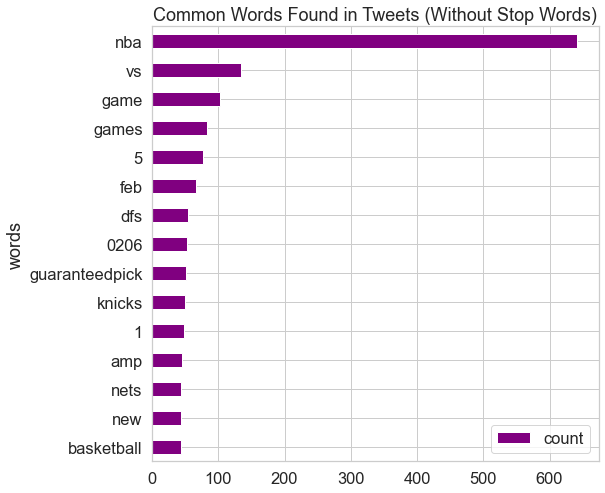

In [16]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [23]:
collection_words = ['nba', 'basketball', 'vs', 'game', 'games']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

tweets_nsw_nc[0]

['mia', 'goran', 'dragic', 'ankle', 'listed', 'sunday']

In [24]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('5', 76),
 ('feb', 66),
 ('dfs', 54),
 ('0206', 53),
 ('guaranteedpick', 51),
 ('knicks', 50),
 ('1', 48),
 ('amp', 45),
 ('nets', 44),
 ('new', 43),
 ('nbatwitter', 43),
 ('today', 42),
 ('players', 40),
 ('saturday', 38),
 ('play', 37)]

In [25]:
len(counts_nsw_nc)

3960

In [26]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,5,76
1,feb,66
2,dfs,54
3,0206,53
4,guaranteedpick,51


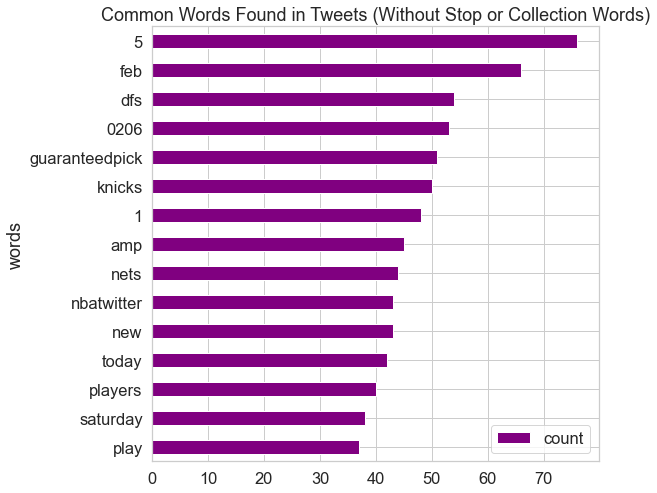

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()